# Inference Cell Segmentation and Classification 

In [1]:
import sys 
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..") 

In [2]:
from cellotype.predict import CelloTypeAnnoter

## Load the image

In [3]:
img = io.imread('data/example/example_codex.tif')
img.shape

(512, 512, 92)

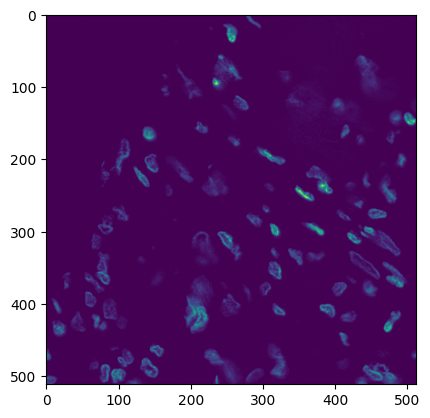

In [4]:
plt.imshow(img[:,:,0])

## Load the pretrained model and make predictions

In [ ]:
model = CelloTypeAnnoter('cellotype/models/crc_model_0005999.pth',confidence_thresh=0.3, max_det=1000, device='cuda', 
                           config_path='cellotype/configs/maskdino_R50_bs16_50ep_4s_dowsample1_2048.yaml')

In [6]:
output = model.predict(img)

## Visualize the results using Detectron2 library

In [7]:
from detectron2.utils.visualizer import Visualizer
from skimage.exposure import equalize_adapthist
from skimage.exposure import rescale_intensity
from detectron2.data import DatasetCatalog, MetadataCatalog

In [8]:
celltype_dict = {"granulocytes": 0, "vasculature": 1, "CD4+ T cells CD45RO+": 2, "tumor cells": 3, "stroma": 4, "CD68+CD163+ macrophages": 5, "adipocytes": 6, "plasma cells": 7, "CD8+ T cells": 8, "dirt": 9, "Tregs": 10, "CD4+ T cells": 11, "CD11c+ DCs": 12, "B cells": 13, "CD11b+CD68+ macrophages": 14, "smooth muscle": 15, "undefined": 16, "tumor cells / immune cells": 17, "immune cells / vasculature": 18, "immune cells": 19, "NK cells": 20, "nerves": 21, "CD68+ macrophages GzmB+": 22, "CD68+ macrophages": 23, "lymphatics": 24, "CD11b+ monocytes": 25, "CD4+ T cells GATA3+": 26, "CD163+ macrophages": 27, "CD3+ T cells": 28}
metadata = MetadataCatalog.get("crc").set(thing_classes=list(celltype_dict.keys()))

In [9]:
show_img = img[:, :, [29,33,0]]
show_img[:, :, 1] = 0
show_img = equalize_adapthist(show_img)
show_img = rescale_intensity(show_img, out_range=(0, 255))
v = Visualizer(show_img,
            metadata=metadata, 
            scale=2,  
)

In [10]:
out = v.draw_instance_predictions(output)

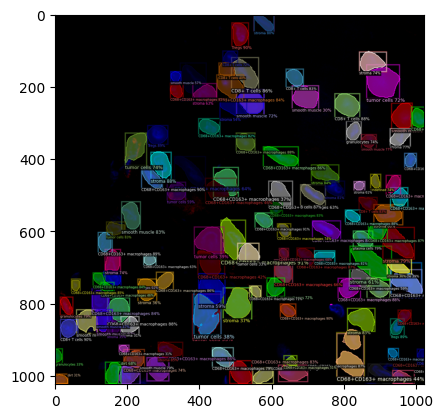

In [11]:
plt.imshow(out.get_image())

In [13]:
out.save('figures/example_crc.png')